In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import pyplot

from numpy.random import randn


In [3]:
#read diabetes dataset from Google Drive
#path = "/content/drive/My Drive/Datasets/diabetes-dataset.csv"
data = pd.read_csv('german_credit_data.csv')

**Getting the information of the diabetes dataset**

In [4]:
data.shape

(1000, 21)

In [5]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [6]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [9]:
data['class'].unique()

array(['good', 'bad'], dtype=object)

**Find base accuracy of the original diabetes dataset**

In [10]:
features = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

label = ['class']
x = data[features]
y = data[label]

In [11]:
print(y)

    class
0    good
1     bad
2    good
3    good
4     bad
..    ...
995  good
996  good
997  good
998   bad
999  good

[1000 rows x 1 columns]


In [12]:
mapping = {'good': 1, 'bad': 0}
data['class']=data['class'].map(mapping)
y=data['class']


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=x.columns
for i in col:
    data[i]=le.fit_transform(data[i])
x=data[features]   

In [14]:
##Data normalization

from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
model = scaler.fit(x)
x  =pd.DataFrame(model.transform(x), columns=x.columns, index=x.index)
  

In [15]:
print(y)
print(x)

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64
     checking_status  duration  credit_history   purpose  credit_amount  \
0           0.333333   0.06250            0.25  0.666667       0.154348   
1           0.000000   0.90625            0.75  0.666667       0.836957   
2           1.000000   0.25000            0.25  0.222222       0.423913   
3           0.333333   0.81250            0.75  0.333333       0.921739   
4           0.333333   0.53125            0.50  0.444444       0.797826   
..               ...       ...             ...       ...            ...   
995         1.000000   0.25000            0.75  0.333333       0.336957   
996         0.333333   0.65625            0.75  1.000000       0.718478   
997         1.000000   0.25000            0.75  0.666667       0.075000   
998         0.333333   0.84375            0.75  0.666667       0.360870   
999         0.000000   0.84375      

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_true_train, x_true_test, y_true_train, y_true_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(x_true_train, y_true_train)

y_true_pred = clf_true.predict(x_true_test)

print("Base Accuracy: ",
      metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report: \n",
      metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy:  0.7566666666666667
Base classification report: 
               precision    recall  f1-score   support

           0       0.69      0.36      0.47        91
           1       0.77      0.93      0.84       209

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.74      0.76      0.73       300



In [17]:
x.shape

(1000, 20)

In [18]:
y.shape

(1000,)

In [19]:
data = pd.concat([x,y],axis=1)
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.06250,0.25,0.666667,0.154348,1.0,0.75,1.000000,1.000000,1.0,...,1.000000,0.923077,0.5,0.5,0.333333,0.333333,0.0,1.0,1.0,1
1,0.000000,0.90625,0.75,0.666667,0.836957,0.5,0.00,0.333333,0.000000,1.0,...,1.000000,0.057692,0.5,0.5,0.000000,0.333333,0.0,0.0,1.0,0
2,1.000000,0.25000,0.25,0.222222,0.423913,0.5,0.25,0.333333,1.000000,1.0,...,1.000000,0.576923,0.5,0.5,0.000000,1.000000,1.0,0.0,1.0,1
3,0.333333,0.81250,0.75,0.333333,0.921739,0.5,0.25,0.333333,1.000000,0.5,...,0.333333,0.500000,0.5,0.0,0.000000,0.333333,1.0,0.0,1.0,1
4,0.333333,0.53125,0.50,0.444444,0.797826,0.5,0.00,0.666667,1.000000,1.0,...,0.666667,0.653846,0.5,0.0,0.333333,0.333333,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.25000,0.75,0.333333,0.336957,0.5,0.25,0.666667,0.000000,1.0,...,1.000000,0.230769,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1
996,0.333333,0.65625,0.75,1.000000,0.718478,0.5,0.00,1.000000,0.333333,1.0,...,0.333333,0.403846,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1
997,1.000000,0.25000,0.75,0.666667,0.075000,0.5,0.75,1.000000,1.000000,1.0,...,0.000000,0.365385,0.5,0.5,0.000000,0.333333,0.0,0.0,1.0,1
998,0.333333,0.84375,0.75,0.666667,0.360870,0.5,0.00,1.000000,1.000000,1.0,...,0.666667,0.076923,0.5,0.0,0.000000,0.333333,0.0,1.0,1.0,0


**Build a GAN neural networks**

In [20]:
# generate point in latent space as input for the generator

def generate_latent_points(latent_dim, n_samples):
    # Generate points in the latent space
    x_input = torch.randn(n_samples, latent_dim)
    
    return x_input


In [21]:
import torch
# use the generator to generate n fake examples, with class labels
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def generate_fake_samples(generator, latent_dim, n_samples):
    # Generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # Predict outputs
    x = generator(x_input)
    # Create class labels
    y = np.zeros((n_samples, 1))
    return x.detach().numpy(), y

In [22]:
# generate n real samples with class labels
def generate_real_samples(data, n_samples):
    # Select random samples from the data
    indices = np.random.randint(0, data.shape[0], n_samples)
    X = data.iloc[indices].values
    # Generate class labels for real samples (ones)
    y = np.ones((n_samples, 1))
    return X, y


In [27]:
import torch
import torch.nn as nn

# Define the standalone generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, n_outputs=21):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 15),
            nn.ReLU(),
            nn.Linear(15, 30),
            nn.ReLU(),
            nn.Linear(30, n_outputs),
            
        )

    def init_weights(self):
        nn.init.xavier_uniform_(model[0].weight)
        nn.init.zeros_(model[0].bias)
        
    def forward(self, x):
        x = self.model(x)
        return x

In [28]:
import torch
from torchsummary import summary

generator1 = Generator(10, 21)
print(generator1)


Generator(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=21, bias=True)
  )
)


In [29]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 25),
            nn.ReLU(),
            nn.Linear(25, 50),
            nn.ReLU(),
            nn.Linear(50, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)
        return x


In [30]:

discriminator1 = Discriminator(21)
print(discriminator1)


Discriminator(
  (model): Sequential(
    (0): Linear(in_features=21, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [143]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input_dim=21
hidden_dim=10
output_dim=21
cond_dim =50
#noise = torch.randn(128, input_dim=21)
# Generator Model
class Generator(nn.Module):
    def __init__(self,   hidden_dim,input_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim + 50, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_scalar = nn.Linear(hidden_dim, 1)
        self.fc_mode_indicator = nn.Linear(hidden_dim, output_dim)
        self.fc_discrete = nn.Linear(hidden_dim, 21)

    def forward(self, noise, cond, x):
        x = torch.cat((noise, cond), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

# Critic Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim , 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc_output = nn.Linear(10, 1)

    def forward(self,x):
        
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        output = self.fc_output(x)
        return output



#generator = Generator(21, cond_dim, hidden_dim, output_dim)
#discriminator= Critic(input_dim * 10, cond_dim * 10, hidden_dim)

# Training and optimization steps for the models...


In [138]:
# define the combined generator and disciminator model, for updating the generator

import torch
import torch.nn as nn
import torch.optim as optim

class GAN(nn.Module):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def forward(self, x):
        x = self.generator(x)
        x = self.discriminator(x)
        return x

# Define loss function and optimizer
criterion = nn.BCELoss()
gan_optimizer = None  # Placeholder for optimizer

import torch.optim as optim

def define_gan(generator, discriminator):
    # Make weights in the discriminator not trainable
    for param in discriminator.parameters():
        param.requires_grad = False

    # Combine the generator and discriminator
    gan = nn.Sequential(generator, discriminator)

    # Define loss function and optimizers for generator and discriminator
    criterion = nn.BCELoss()
    generator_optimizer = optim.Adam(generator.parameters(), lr=0.001,eps=1e-07)
    discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.001,eps=1e-07)

    return gan, criterion, generator_optimizer, discriminator_optimizer


In [139]:
# create a line plot of loss for the gan and save to file

def plot_history(d_hist, g_hist):
    # Plot loss
    plt.plot(d_hist, label='Discriminator')
    plt.plot(g_hist, label='Generator')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # plt.savefig('results_baseline/plot_line_plot_loss.png')
    plt.close()


In [140]:
import torch
import torch.nn as nn
import torch.optim as optim



def train(generator, discriminator, gan_model, latent_dim, n_epochs=5, n_batch=128):
    # Define loss function and optimizers
    criterion = nn.BCELoss()
    
    half_batch= int(n_batch / 2)
    
    generator_optimizer = optim.Adam(generator.parameters(), lr=0.001, eps=1e-07)
    discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.001, eps=1e-07)

    batches_per_epoch = int(data.shape[0] / n_batch)

    d_history = []
    g_history = []

    for epoch in range(n_epochs):
        for batch in range(batches_per_epoch):
          
            # Prepare real examples
            x_real, y_real = generate_real_samples(data,half_batch )
            x_real = torch.from_numpy(x_real).float()
            x_real.requires_grad = True  # Enable gradient computation
            y_real = torch.ones(half_batch, 1)

            # Predict outputs of real examples
            d_real_output = discriminator(x_real)
            d_real_loss = criterion(d_real_output, y_real)
            d_real_loss.backward()
            
            # Update discriminator
            discriminator.zero_grad()

            # Prepare fake examples
            x_fake, y_fake = generate_fake_samples(generator, latent_dim, n_batch)
            x_fake = torch.from_numpy(x_fake).float()
            y_fake = torch.zeros(n_batch, 1, requires_grad=True)

            # Predict outputs of fake examples
            d_fake_output = discriminator(x_fake)
            d_fake_loss = criterion(d_fake_output, y_fake)
            d_fake_loss.backward()
            
             # Update discriminator parameters
            d_loss = 0.5 * (d_real_loss + d_fake_loss)
            discriminator_optimizer.step()
            
            # Update generator
            generator.zero_grad()

            
#     # Plot history
#     plot_history(d_history, g_history)
           # Prepare points in latent space as input for the generator
            x_gan = generate_latent_points(latent_dim, n_batch)
            x_gan = torch.Tensor(x_gan)

           # Create inverted labels for the fake samples
            y_gan = torch.ones(n_batch, 1)

# Update the generator via the discriminator's error
            generator_optimizer.zero_grad()
            g_output = gan_model(x_gan)
            g_loss_fake = criterion(g_output, y_gan)
            g_loss_fake.backward()
            generator_optimizer.step()

            print('>%d, d1=%.3f, d2=%.3f, d=%.3f, g=%.3f' % (epoch+1, d_real_loss.item(), d_fake_loss.item(), d_loss.item(), g_loss_fake.item()))
            d_history.append(d_loss.item())
            g_history.append(g_loss_fake.item())

    plot_history(d_history, g_history)

# Save the generator model
torch.save(generator.state_dict(), 'trained_generated_model_20210205_v3.pth')



In [141]:
import matplotlib.pyplot as plt

def summarize_performance(epoch, generator, discriminator, latent_dim, n=1000):
    # Prepare real samples
    x_real, y_real = generate_real_samples(n)

    # Evaluate discriminator on real examples
    with torch.no_grad():
        d_real_output = discriminator(x_real)
        d_real_accuracy = (d_real_output >= 0.5).float().mean().item()

    # Prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    x_fake = torch.from_numpy(x_fake).float()

    # Evaluate discriminator on fake examples
    with torch.no_grad():
        d_fake_output = discriminator(x_fake)
        d_fake_accuracy = (d_fake_output < 0.5).float().mean().item()

    # Summarize discriminator performance
    print(f"{epoch}: Real Accuracy: {d_real_accuracy:.4f}, Fake Accuracy: {d_fake_accuracy:.4f}")

    # Scatter plot real and fake data points
    plt.scatter(x_real[:, 0], x_real[:, 1], color='red', label='Real')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue', label='Fake')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [144]:
# Size of the latent space
latent_dim = 10

# Create the discriminator
discriminator = Discriminator(21)

# Create the generator
generator = Generator(21,10)

# Create the GAN, criterion, and optimizers
gan_model, criterion, generator_optimizer, discriminator_optimizer = define_gan(generator, discriminator)

# Train the model
train(generator, discriminator, gan_model, latent_dim)


RuntimeError: all elements of input should be between 0 and 1

In [66]:
import torch

# Load the trained model
model = Generator(latent_dim=10)
model.load_state_dict(torch.load('trained_generated_model_20210205_v3.pth'))
model.eval()

# Generate latent points
latent_points = generate_latent_points(10, 1000)
latent_points_tensor = torch.tensor(latent_points).float()

# Generate samples using the model
with torch.no_grad():
    generated_samples = model(latent_points_tensor)

# Convert the generated samples to a numpy array
#generated_samples = generated_samples.numpy()


C:\Users\arnab\AppData\Local\Temp\ipykernel_10484\2045710644.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latent_points_tensor = torch.tensor(latent_points).float()


In [67]:
x= generated_samples

In [68]:
data_fake = pd.DataFrame(data=x.detach().numpy(), columns=['checking_status', 'duration', 'credit_history', 'purpose',
                                                           'credit_amount', 'savings_status', 'employment',
                                                           'installment_commitment', 'personal_status', 'other_parties',
                                                           'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
                                                           'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
                                                           'foreign_worker', 'class'])


In [69]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.222838,-0.238068,0.459674,-0.640078,0.415887,-0.154939,-0.480776,-0.261128,0.107432,-0.294221,...,-0.037336,-0.202318,-0.060019,-0.326645,0.246327,-0.309010,0.584177,0.346877,0.518232,-0.215871
1,0.175629,-0.133317,0.277181,-0.349149,0.234217,-0.185580,-0.304726,-0.194828,0.027133,-0.115980,...,0.040501,-0.140441,0.003161,-0.215929,0.068430,-0.221033,0.317474,0.302794,0.352867,-0.096611
2,0.203248,0.034472,0.098108,-0.299491,0.011967,-0.070328,-0.152090,-0.209622,-0.038352,-0.176878,...,0.149721,-0.195522,-0.043977,-0.166840,-0.087792,-0.175061,0.205653,0.135661,0.251369,0.029119
3,0.119226,-0.007560,0.160981,-0.260477,0.074631,-0.081240,-0.221713,-0.172459,0.084369,-0.176362,...,0.033293,-0.093958,0.106326,-0.060956,-0.037352,-0.136136,0.251354,0.162534,0.325847,-0.026317
4,0.195831,0.117162,0.176914,-0.369317,0.034024,-0.177062,-0.257209,-0.298619,0.035447,-0.428946,...,0.215608,-0.311457,0.069052,-0.007835,0.017971,-0.189856,0.416998,0.203941,0.449296,-0.074964


In [70]:
data_fake['class'].min()

-0.4027038

In [71]:
data_fake['class'].max()

0.15683347

In [72]:
class_mean = data_fake['class'].mean()

In [73]:
data_fake['class'] = data_fake['class'] > class_mean

In [74]:
data_fake['class']

0      False
1      False
2       True
3       True
4       True
       ...  
995    False
996     True
997    False
998     True
999     True
Name: class, Length: 1000, dtype: bool

In [75]:
data_fake['class'] = data_fake['class'].astype(int)

In [76]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.222838,-0.238068,0.459674,-0.640078,0.415887,-0.154939,-0.480776,-0.261128,0.107432,-0.294221,...,-0.037336,-0.202318,-0.060019,-0.326645,0.246327,-0.309010,0.584177,0.346877,0.518232,0
1,0.175629,-0.133317,0.277181,-0.349149,0.234217,-0.185580,-0.304726,-0.194828,0.027133,-0.115980,...,0.040501,-0.140441,0.003161,-0.215929,0.068430,-0.221033,0.317474,0.302794,0.352867,0
2,0.203248,0.034472,0.098108,-0.299491,0.011967,-0.070328,-0.152090,-0.209622,-0.038352,-0.176878,...,0.149721,-0.195522,-0.043977,-0.166840,-0.087792,-0.175061,0.205653,0.135661,0.251369,1
3,0.119226,-0.007560,0.160981,-0.260477,0.074631,-0.081240,-0.221713,-0.172459,0.084369,-0.176362,...,0.033293,-0.093958,0.106326,-0.060956,-0.037352,-0.136136,0.251354,0.162534,0.325847,1
4,0.195831,0.117162,0.176914,-0.369317,0.034024,-0.177062,-0.257209,-0.298619,0.035447,-0.428946,...,0.215608,-0.311457,0.069052,-0.007835,0.017971,-0.189856,0.416998,0.203941,0.449296,1


In [77]:

x_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [78]:
x_fake_train, x_fake_test, y_fake_train, y_fake_test = train_test_split(x_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(x_fake_train, y_fake_train)

y_fake_pred = clf_fake.predict(x_fake_test)
print("Accuracy of fake data model: ", metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model: \n", metrics.classification_report(y_fake_test, y_fake_pred))

C:\Users\arnab\AppData\Local\Temp\ipykernel_10484\220183580.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_fake.fit(x_fake_train, y_fake_train)


Accuracy of fake data model:  0.8866666666666667
Classification report of fake data model: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       138
           1       0.87      0.93      0.90       162

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.89      0.89      0.89       300



In [79]:
x_final = x[:, :20]
print('x_final: ', x_final[:3])

y_final = x[:, :]
print('y_final: ', y_final[:3])

x_final:  tensor([[ 0.2228, -0.2381,  0.4597, -0.6401,  0.4159, -0.1549, -0.4808, -0.2611,
          0.1074, -0.2942, -0.3474, -0.0373, -0.2023, -0.0600, -0.3266,  0.2463,
         -0.3090,  0.5842,  0.3469,  0.5182],
        [ 0.1756, -0.1333,  0.2772, -0.3491,  0.2342, -0.1856, -0.3047, -0.1948,
          0.0271, -0.1160, -0.1885,  0.0405, -0.1404,  0.0032, -0.2159,  0.0684,
         -0.2210,  0.3175,  0.3028,  0.3529],
        [ 0.2032,  0.0345,  0.0981, -0.2995,  0.0120, -0.0703, -0.1521, -0.2096,
         -0.0384, -0.1769, -0.2284,  0.1497, -0.1955, -0.0440, -0.1668, -0.0878,
         -0.1751,  0.2057,  0.1357,  0.2514]])
y_final:  tensor([[ 0.2228, -0.2381,  0.4597, -0.6401,  0.4159, -0.1549, -0.4808, -0.2611,
          0.1074, -0.2942, -0.3474, -0.0373, -0.2023, -0.0600, -0.3266,  0.2463,
         -0.3090,  0.5842,  0.3469,  0.5182, -0.2159],
        [ 0.1756, -0.1333,  0.2772, -0.3491,  0.2342, -0.1856, -0.3047, -0.1948,
          0.0271, -0.1160, -0.1885,  0.0405, -0.1404,  0.

In [80]:
x = x[:, :20]

In [81]:
y_fake_pred = clf_true.predict(x.detach().numpy())


C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
y_fake_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [60]:
!pip install table_evaluator

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [83]:
data_fake.shape

(1000, 21)

In [84]:
data.shape

(1000, 21)

In [85]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.222838,-0.238068,0.459674,-0.640078,0.415887,-0.154939,-0.480776,-0.261128,0.107432,-0.294221,...,-0.037336,-0.202318,-0.060019,-0.326645,0.246327,-0.309010,0.584177,0.346877,0.518232,0
1,0.175629,-0.133317,0.277181,-0.349149,0.234217,-0.185580,-0.304726,-0.194828,0.027133,-0.115980,...,0.040501,-0.140441,0.003161,-0.215929,0.068430,-0.221033,0.317474,0.302794,0.352867,0
2,0.203248,0.034472,0.098108,-0.299491,0.011967,-0.070328,-0.152090,-0.209622,-0.038352,-0.176878,...,0.149721,-0.195522,-0.043977,-0.166840,-0.087792,-0.175061,0.205653,0.135661,0.251369,1
3,0.119226,-0.007560,0.160981,-0.260477,0.074631,-0.081240,-0.221713,-0.172459,0.084369,-0.176362,...,0.033293,-0.093958,0.106326,-0.060956,-0.037352,-0.136136,0.251354,0.162534,0.325847,1
4,0.195831,0.117162,0.176914,-0.369317,0.034024,-0.177062,-0.257209,-0.298619,0.035447,-0.428946,...,0.215608,-0.311457,0.069052,-0.007835,0.017971,-0.189856,0.416998,0.203941,0.449296,1


In [86]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.06250,0.25,0.666667,0.154348,1.0,0.75,1.000000,1.0,1.0,...,1.000000,0.923077,0.5,0.5,0.333333,0.333333,0.0,1.0,1.0,1
1,0.000000,0.90625,0.75,0.666667,0.836957,0.5,0.00,0.333333,0.0,1.0,...,1.000000,0.057692,0.5,0.5,0.000000,0.333333,0.0,0.0,1.0,0
2,1.000000,0.25000,0.25,0.222222,0.423913,0.5,0.25,0.333333,1.0,1.0,...,1.000000,0.576923,0.5,0.5,0.000000,1.000000,1.0,0.0,1.0,1
3,0.333333,0.81250,0.75,0.333333,0.921739,0.5,0.25,0.333333,1.0,0.5,...,0.333333,0.500000,0.5,0.0,0.000000,0.333333,1.0,0.0,1.0,1
4,0.333333,0.53125,0.50,0.444444,0.797826,0.5,0.00,0.666667,1.0,1.0,...,0.666667,0.653846,0.5,0.0,0.333333,0.333333,1.0,0.0,1.0,0


In [87]:
from table_evaluator import load_data, TableEvaluator

In [88]:
table_evaluator = TableEvaluator(data, data_fake)

In [89]:
table_evaluator.evaluate(target_col='class')

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:95: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3950   0.8750              0.2658
DecisionTreeClassifier_real   0.7200   0.5200              0.3245
LogisticRegression_fake       0.5550   0.8750              0.4286
LogisticRegression_real       0.7250   0.5200              0.3559
MLPClassifier_fake            0.5550   0.9250              0.3889
MLPClassifier_real            0.7000   0.2900              0.1765
RandomForestClassifier_fake   0.3850   0.8800              0.2232
RandomForestClassifier_real   0.7500   0.3000              0.1905

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    3.5821
nearest neighbor std                     0.5952

Miscellaneous results:
                                  Result
Column Cor

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:121: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(


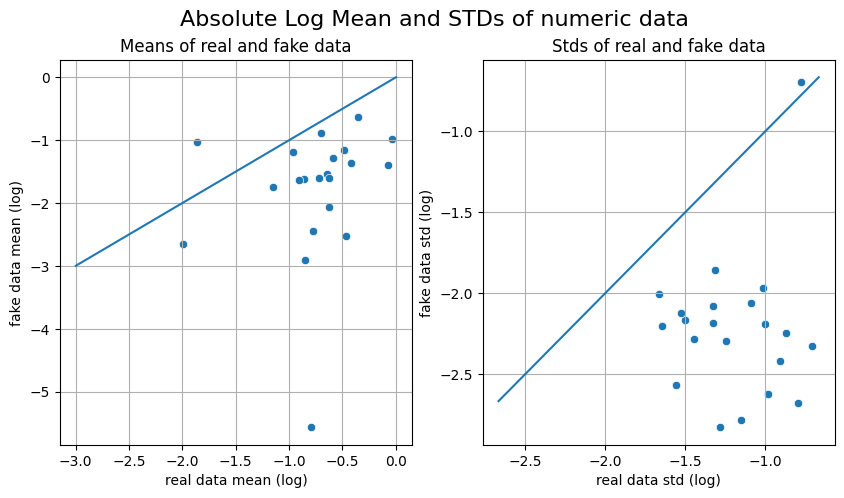

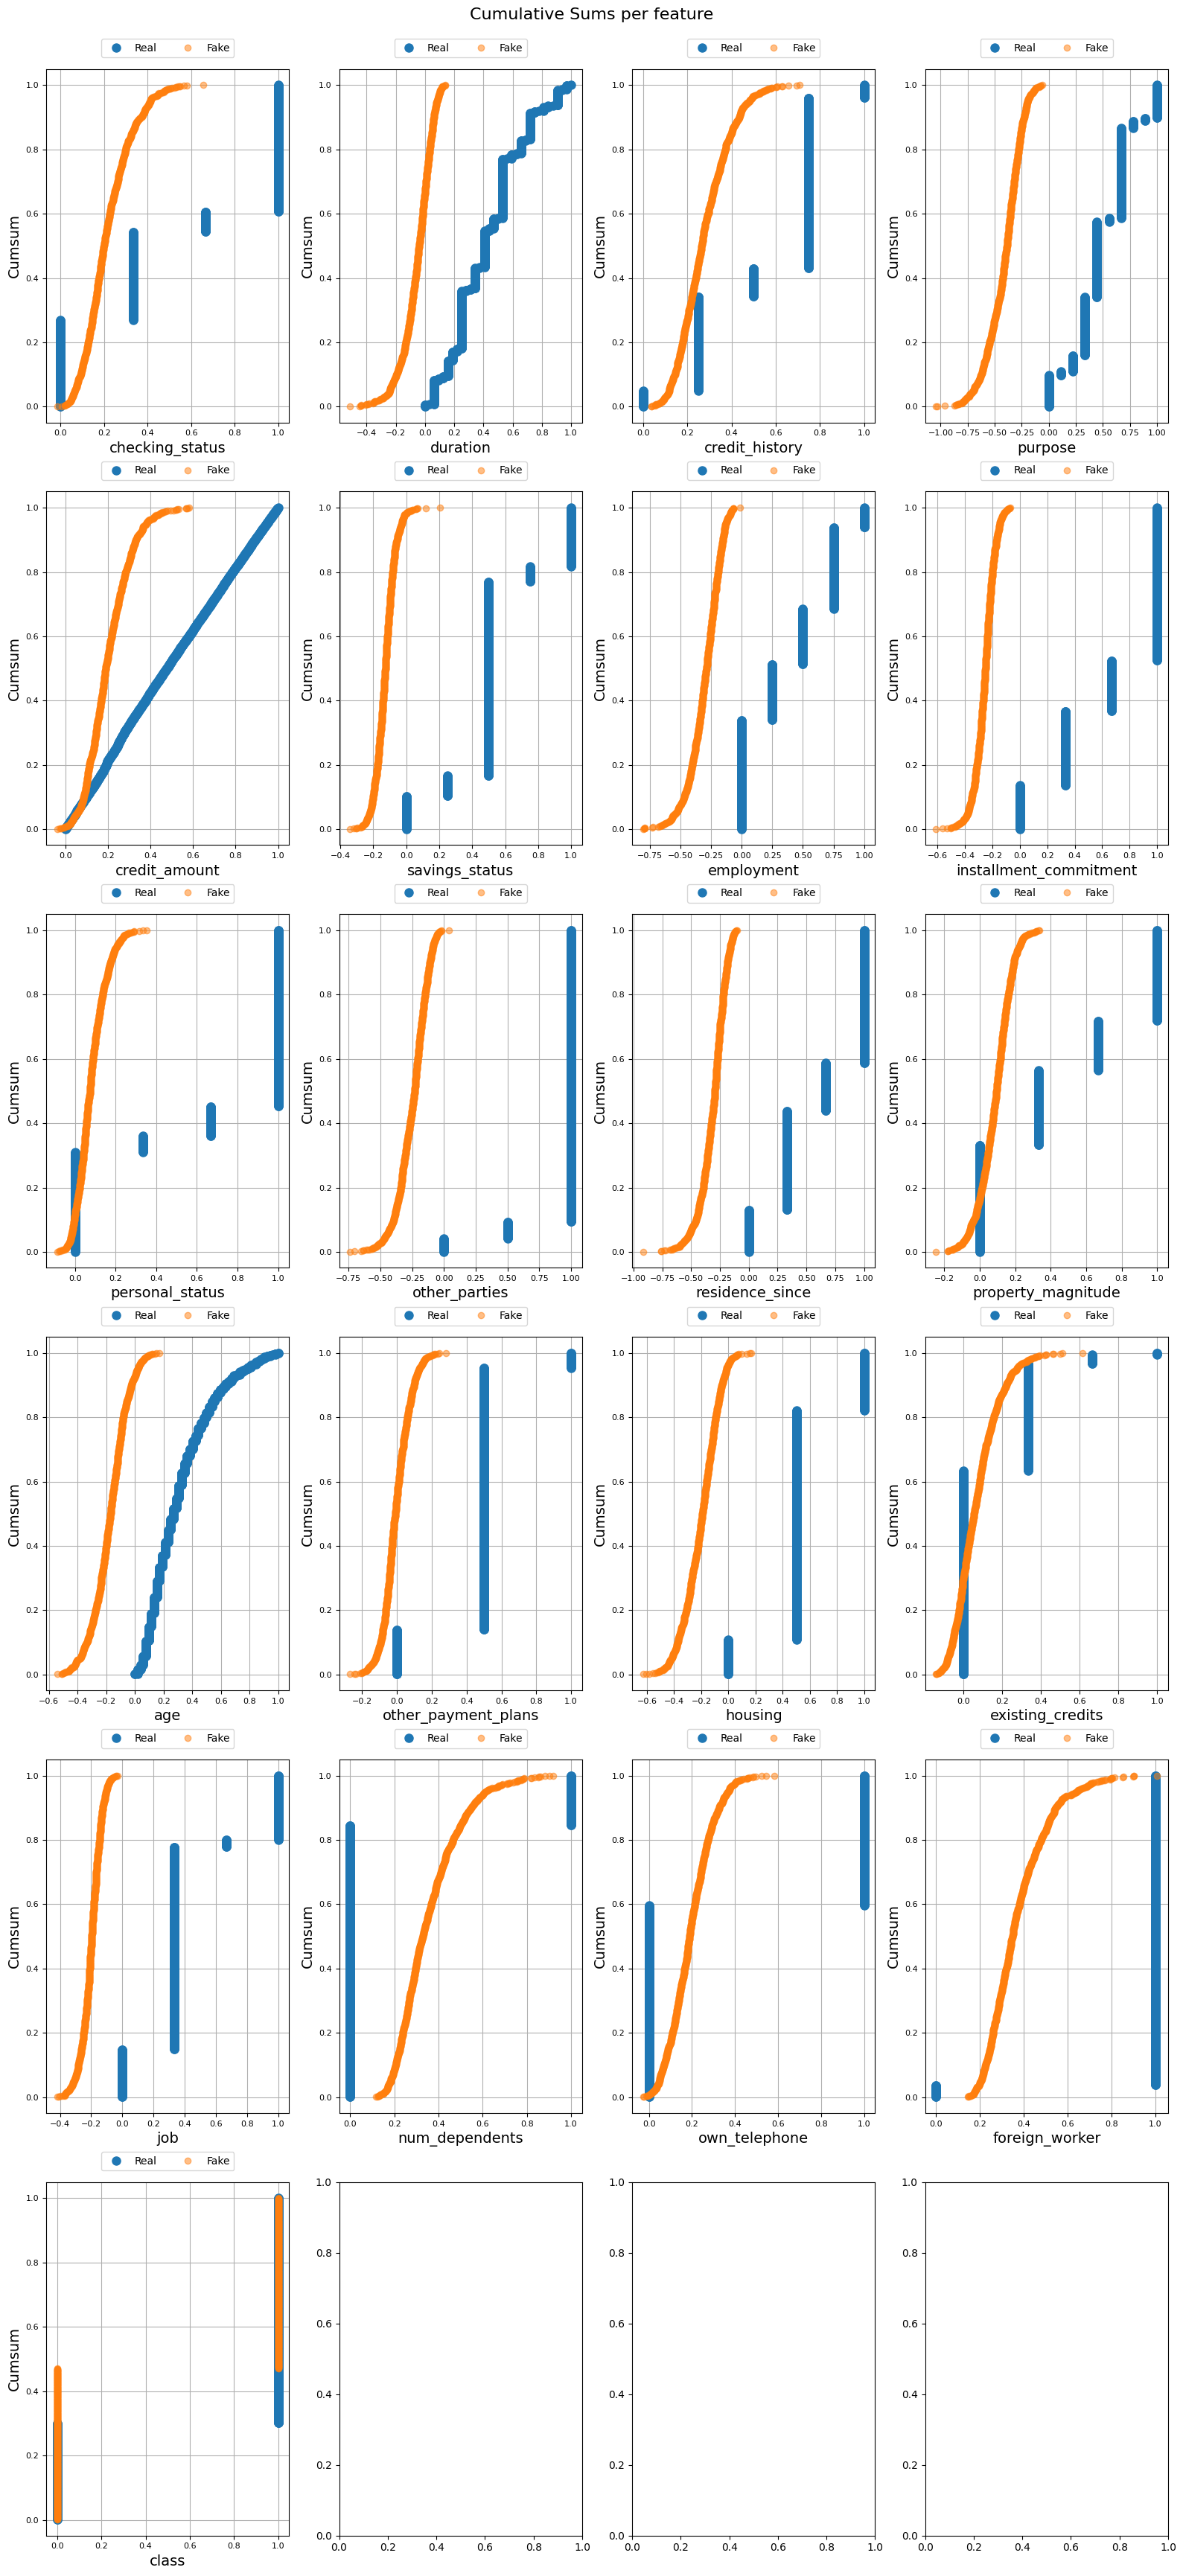

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

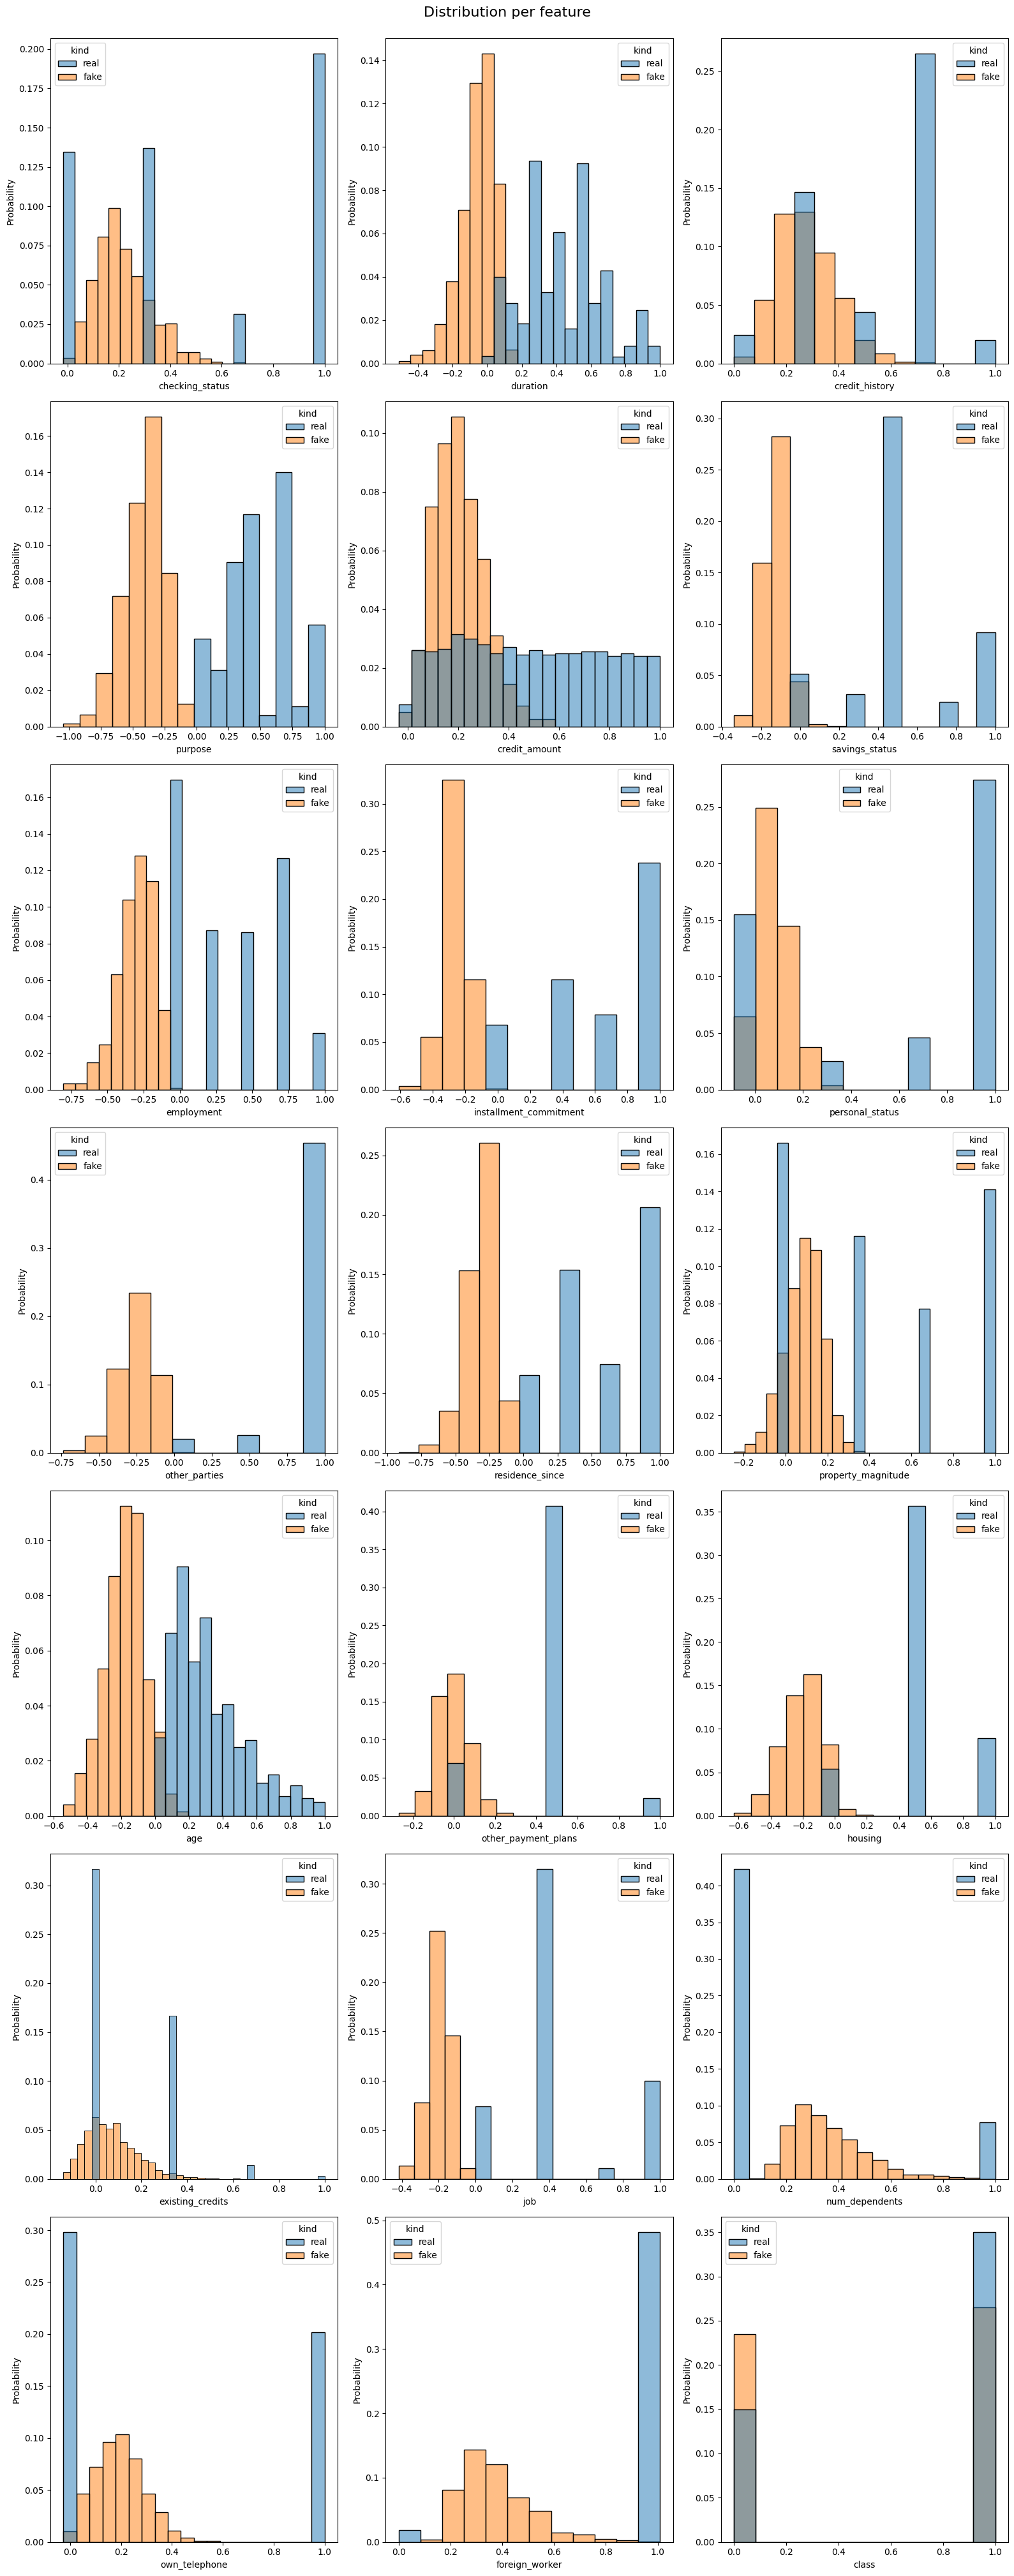

TypeError: Image data of dtype object cannot be converted to float

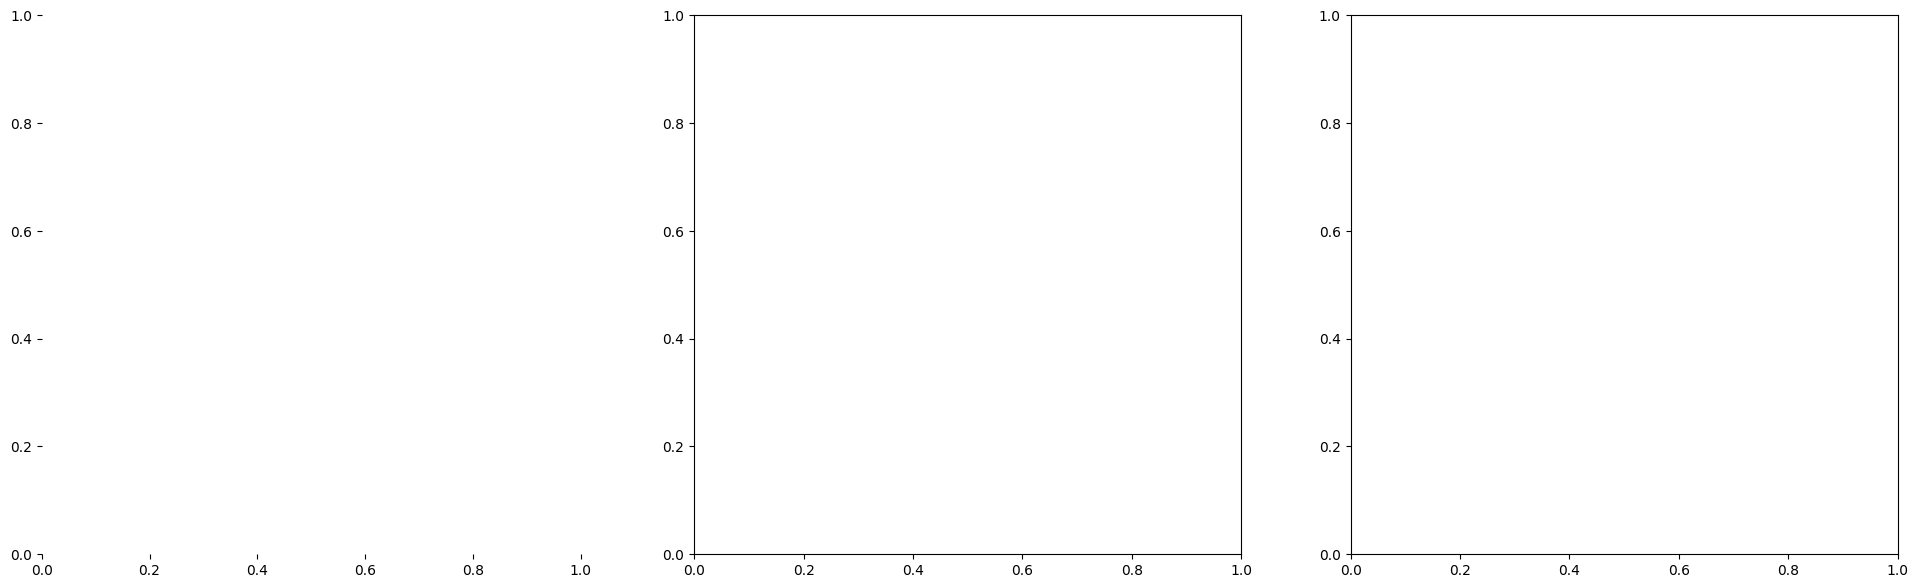

In [90]:
table_evaluator.visual_evaluation()